<a href="https://colab.research.google.com/github/SyedImranML/Machine-Learning-Projects/blob/main/UBER_RIDE_FARE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2_contingency
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from random import randrange, uniform


In [54]:
# Load the training data
train_data = pd.read_csv('/content/uber_sampled_train.csv')



In [55]:
# Top 2 rows

train_data.head(2)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,13112538,2013-09-12 19:48:00.00000048,14.5,2013-09-12 19:48:00 UTC,-73.963927,40.776715,-73.981230,40.744362,5
1,27522324,2013-08-22 21:51:33.0000001,18.5,2013-08-22 21:51:33 UTC,-73.987196,40.720433,-73.979128,40.772561,1


**Data Cleaning**

In [43]:
# Check for missing values in the training data
missing_values = train_data.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

Unnamed: 0           0
key                  0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
pickup_hour          0
dtype: int64


In [56]:
train_data.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [57]:
train_data.drop(labels='key',axis=1,inplace=True)

In [58]:
train_data.shape

(70000, 7)

In [59]:
test = pd.read_csv(r'/content/uber_sampled_test.csv')
test.head(1)

,Unnamed: 0,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.97332,40.763805,-73.98143,40.743835,1


In [60]:
test.shape,train_data.shape

((9914, 8), (70000, 7))

In [61]:
train_data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,14.5,2013-09-12 19:48:00 UTC,-73.963927,40.776715,-73.981230,40.744362,5
1,18.5,2013-08-22 21:51:33 UTC,-73.987196,40.720433,-73.979128,40.772561,1
2,5.3,2009-05-11 18:46:00 UTC,-73.989912,40.751997,-73.977732,40.748800,1
3,10.5,2009-11-17 20:52:54 UTC,-73.987425,40.741593,-73.958254,40.772870,1
4,16.1,2011-07-14 20:33:39 UTC,-73.978324,40.745629,-73.994166,40.703158,1


In [62]:
test.head()

,Unnamed: 0,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


As this is Taxi fare data and we know there are many factors which affect the price of taxi like

1. Travelled distance
2. Time of Travel
3. Demand and Availability of Taxi
4. Some special places are more costlier like Airport or other places where there might be toll

In [64]:
print(train_data.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        70000 non-null  float64
 1   pickup_datetime    70000 non-null  object 
 2   pickup_longitude   70000 non-null  float64
 3   pickup_latitude    70000 non-null  float64
 4   dropoff_longitude  70000 non-null  float64
 5   dropoff_latitude   70000 non-null  float64
 6   passenger_count    70000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 3.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9914 non-null   int64  
 1   key                9914 non-null   object 
 2   pickup_datetime    9914 non-null   object 
 3   pickup_longitude   9914 non-null   float64

 we can observed that  there are 7 columns in which 5 numerics and 2 are object.

Lets change the type of pickup_datetime from object to DateTime

In [65]:
train_data["pickup_datetime"] = pd.to_datetime(train_data["pickup_datetime"])

In [66]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   fare_amount        70000 non-null  float64            
 1   pickup_datetime    70000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   70000 non-null  float64            
 3   pickup_latitude    70000 non-null  float64            
 4   dropoff_longitude  70000 non-null  float64            
 5   dropoff_latitude   70000 non-null  float64            
 6   passenger_count    70000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 3.7 MB
None


In [67]:
train_data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,11.261658,-72.498630,39.950258,-72.508637,39.918108,1.693429
std,9.654077,10.881647,9.566680,10.544393,6.898035,1.319192
min,0.010000,-736.016667,-74.008928,-75.415770,-834.457250,0.000000
25%,6.000000,-73.992038,40.735181,-73.991315,40.734205,1.000000
50%,8.500000,-73.981690,40.752911,-73.980215,40.753299,1.000000
75%,12.500000,-73.967018,40.767330,-73.963817,40.768167,2.000000
max,247.000000,363.630298,1993.880665,405.566222,42.387233,6.000000


In [68]:
train_data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

Lets see the statistics of our data

<ipython-input-72-a1f3b7574faa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['fare_amount'])


<Axes: xlabel='fare_amount', ylabel='Density'>

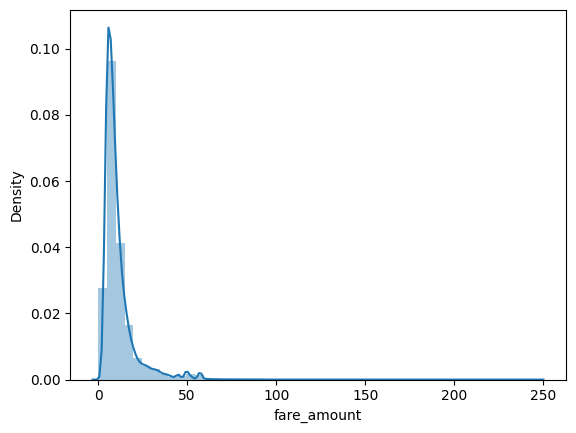

In [72]:
sns.distplot(train_data['fare_amount'])

<ipython-input-73-04a3ff582d12>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['pickup_latitude'])


<Axes: xlabel='pickup_latitude', ylabel='Density'>

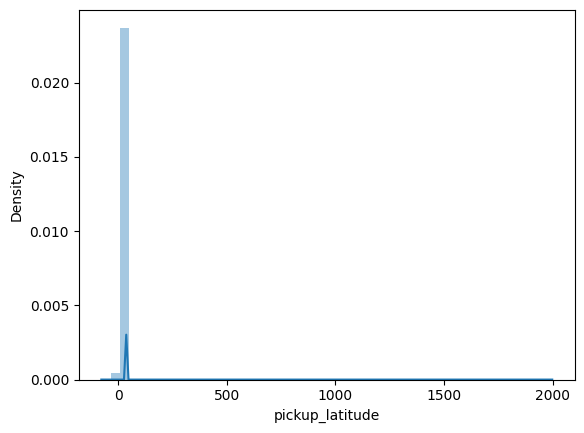

In [73]:
sns.distplot(train_data['pickup_latitude'])

<ipython-input-74-08e1b4536df2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['pickup_longitude'])


<Axes: xlabel='pickup_longitude', ylabel='Density'>

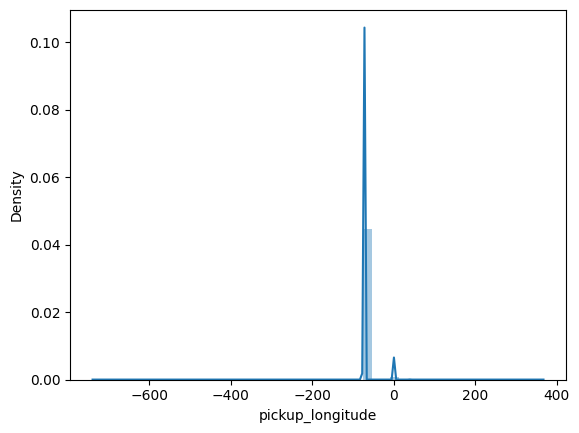

In [74]:
sns.distplot(train_data['pickup_longitude'])

<ipython-input-75-98030f9b7af7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['dropoff_longitude'])


<Axes: xlabel='dropoff_longitude', ylabel='Density'>

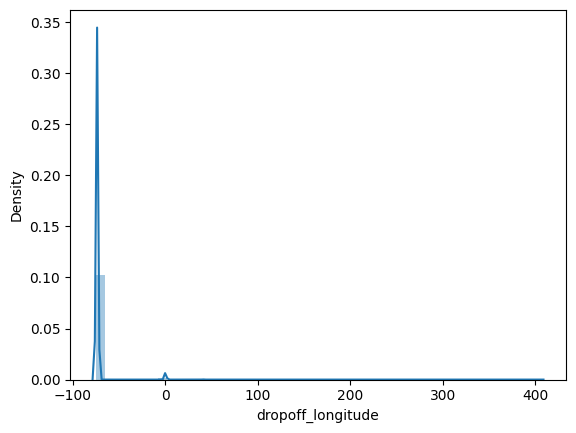

In [75]:
sns.distplot(train_data['dropoff_longitude'])

<ipython-input-77-f5a9012c62ac>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['dropoff_latitude'])


<Axes: xlabel='dropoff_latitude', ylabel='Density'>

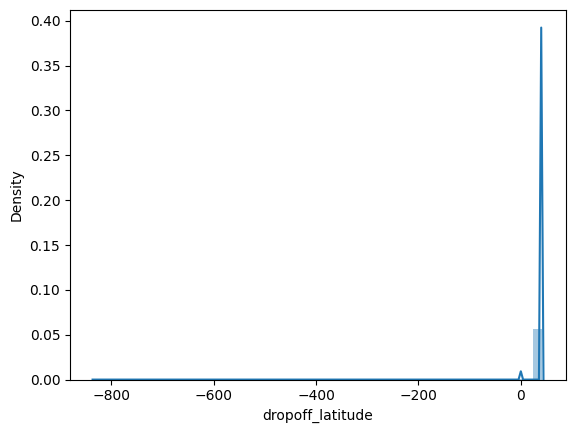

In [77]:
sns.distplot(train_data['dropoff_latitude'])

In [78]:
print("drop_off latitude min value",train_data["dropoff_latitude"].min())
print("drop_off latitude max value",train_data["dropoff_latitude"].max())
print("drop_off longitude min value", train_data["dropoff_longitude"].min())
print("drop_off longitude max value",train_data["dropoff_longitude"].max())
print("pickup latitude min value",train_data["pickup_latitude"].min())
print("pickup latitude max value",train_data["pickup_latitude"].max())
print("pickup longitude min value",train_data["pickup_longitude"].min())
print("pickup longitude max value",train_data["pickup_longitude"].max())

drop_off latitude min value -834.45725
drop_off latitude max value 42.387233
drop_off longitude min value -75.415770475609
drop_off longitude max value 405.566222
pickup latitude min value -74.008928
pickup latitude max value 1993.880665
pickup longitude min value -736.016667
pickup longitude max value 363.630298


In [79]:
print("drop_off latitude min value",test["dropoff_latitude"].min())
print("drop_off latitude max value",test["dropoff_latitude"].max())
print("drop_off longitude min value", test["dropoff_longitude"].min())
print("drop_off longitude max value",test["dropoff_longitude"].max())
print("pickup latitude min value",test["pickup_latitude"].min())
print("pickup latitude max value",test["pickup_latitude"].max())
print("pickup longitude min value",test["pickup_longitude"].min())
print("pickup longitude max value",test["pickup_longitude"].max())

drop_off latitude min value 40.568973
drop_off latitude max value 41.696683
drop_off longitude min value -74.263242
drop_off longitude max value -72.990963
pickup latitude min value 40.573143
pickup latitude max value 41.709555
pickup longitude min value -74.252193
pickup longitude max value -72.986532


In [80]:
min_longitude=-1491.194073,
min_latitude=-74.001047,
max_longitude=40.812005,
max_latitude=41.709555

In [81]:
tempdf=train_data[(train_data["dropoff_latitude"]<min_latitude) |
                (train_data["pickup_latitude"]<min_latitude) |
                (train_data["dropoff_longitude"]<min_longitude) |
                (train_data["pickup_longitude"]<min_longitude) |
                (train_data["dropoff_latitude"]>max_latitude) |
                (train_data["pickup_latitude"]>max_latitude) |
                (train_data["dropoff_longitude"]>max_longitude) |
                (train_data["pickup_longitude"]>max_longitude) ]
print("before droping",train_data.shape)
train_data.drop(tempdf.index,inplace=True)
print("after droping",train_data.shape)

before droping (70000, 7)
after droping (69988, 7)


In [82]:
import calendar
train_data['day']=train_data['pickup_datetime'].apply(lambda x:x.day)
train_data['hour']=train_data['pickup_datetime'].apply(lambda x:x.hour)
train_data['month']=train_data['pickup_datetime'].apply(lambda x:x.month)
train_data['year']=train_data['pickup_datetime'].apply(lambda x:x.year)
train_data['weekday']=train_data['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])

In [86]:
train_data.weekday = train_data.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [88]:
train_data.drop(labels = 'pickup_datetime',axis=1,inplace=True)

**Model** **Building**

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x=train_data.drop("fare_amount", axis=1)
x

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
0,-73.963927,40.776715,-73.981230,40.744362,5,12,19,9,2013,4
1,-73.987196,40.720433,-73.979128,40.772561,1,22,21,8,2013,4
2,-73.989912,40.751997,-73.977732,40.748800,1,11,18,5,2009,1
3,-73.987425,40.741593,-73.958254,40.772870,1,17,20,11,2009,2
4,-73.978324,40.745629,-73.994166,40.703158,1,14,20,7,2011,4
...,...,...,...,...,...,...,...,...,...,...
69995,-73.971322,40.753210,-73.895368,40.707588,1,15,0,6,2010,2
69996,-73.950905,40.770807,-73.961363,40.771855,1,19,14,6,2014,4
69997,0.000000,0.000000,0.000000,0.000000,1,5,11,9,2013,4
69998,-73.982768,40.756722,-73.981030,40.778332,1,13,12,10,2010,3


In [91]:
y=train_data["fare_amount"]

In [92]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [93]:
x_train.head()


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
29802,-73.984140,40.754765,-74.000040,40.738060,1,2,22,10,2013,3
16903,-73.991707,40.749720,-73.994840,40.740257,1,21,11,2,2014,5
6917,-73.999233,40.733485,-73.971887,40.754998,1,22,21,6,2011,3
4288,-73.975008,40.760788,-74.003923,40.747743,1,11,21,8,2010,3
39045,-73.995550,40.724871,-74.007854,40.738126,1,10,17,12,2013,2


In [94]:
x_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
36642,-73.981949,40.745846,-73.972862,40.746651,3,9,14,4,2015,4
27029,-73.980718,40.781475,-73.998932,40.760751,1,18,18,1,2014,6
66041,-73.955976,40.772288,-73.985897,40.755926,1,16,14,5,2009,6
60284,-73.982652,40.773395,-73.987031,40.751006,1,15,6,4,2010,4
53145,-73.979435,40.743912,-73.979475,40.737259,2,17,23,5,2010,1


In [95]:
y_train.head()

29802    8.0
16903    6.0
6917     9.7
4288     5.3
39045    8.0
Name: fare_amount, dtype: float64

In [96]:
y_test.head()

36642     8.0
27029     8.5
66041    14.9
60284     6.5
53145     4.1
Name: fare_amount, dtype: float64

In [97]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(55990, 10)
(13998, 10)
(13998,)
(55990,)


**Linear Regression**

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
lrmodel=LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [100]:
predictedvalues = lrmodel.predict(x_test)

In [101]:
from sklearn.metrics import mean_squared_error

In [102]:
lrmodelrmse = np.sqrt(mean_squared_error(predictedvalues, y_test))
print("RMSE value for Linear regression is", lrmodelrmse)

RMSE value for Linear regression is 9.635058913168518


**Random Forest**

In [103]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)

In [104]:
rfrmodel.fit(x_train,y_train)
rfrmodel_pred= rfrmodel.predict(x_test)

In [105]:
rfrmodel_rmse=np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE value for Random forest regression is ",rfrmodel_rmse)

RMSE value for Random forest regression is  4.475462258396818


In [107]:
# Working on Test Data
test = pd.read_csv(r'/content/uber_sampled_test.csv')


In [108]:
rfrmodel_pred= rfrmodel.predict(test)
df = pd.DataFrame(rfrmodel_pred)
df

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Unnamed: 0
- key
- pickup_datetime
Feature names seen at fit time, yet now missing:
- day
- hour
- month
- weekday
- year


In [8]:
# Check the data type of the 'pickup_datetime' column
pickup_datetime_type = train_data['pickup_datetime'].dtypes

# Display the data type
print(pickup_datetime_type)

object


In [9]:

# Convert 'pickup_datetime' to datetime format
train_data['pickup_datetime'] = pd.to_datetime(train_data['pickup_datetime'])



In [10]:
# Check the data type of the 'pickup_datetime' column
pickup_datetime_type = train_data['pickup_datetime'].dtypes

# Display the data type
print(pickup_datetime_type)

datetime64[ns, UTC]


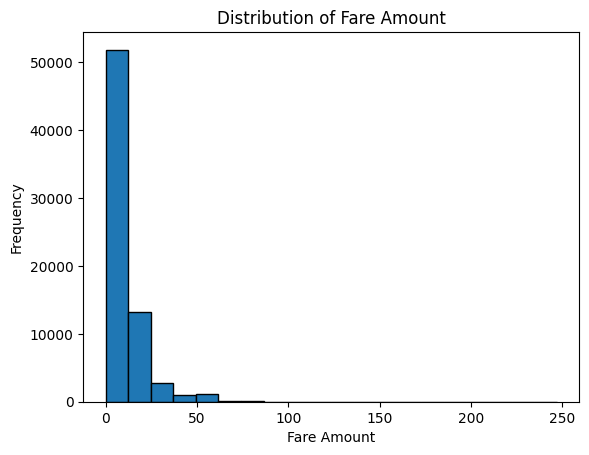

In [11]:
# EDA
# Example: Visualize the distribution of the target variable
plt.hist(train_data['fare_amount'], bins=20, edgecolor='black')
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()



In [12]:
# Feature Engineering
# Example: Extract hour from pickup_datetime
train_data['pickup_hour'] = train_data['pickup_datetime'].dt.hour



In [13]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(train_data.drop('fare_amount', axis=1), train_data['fare_amount'], test_size=0.2, random_state=42)



In [21]:
X_train.columns

Index(['Unnamed: 0', 'key', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_hour'],
      dtype='object')

In [23]:
print(train_data.dtypes)

Unnamed: 0                         int64
key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
pickup_hour                        int64
dtype: object


In [25]:
# Display column names in X_train
print(X_train.columns)

Index(['Unnamed: 0', 'key', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_hour'],
      dtype='object')


In [26]:
# Display column names in train_data
print(train_data.columns)

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'pickup_hour'],
      dtype='object')


In [27]:
# Assuming 'pickup_datetime' is in X_train
# Check the exact column name in X_train
if 'pickup_datetime' in X_train.columns:
    X_train = X_train.drop('pickup_datetime', axis=1)
else:
    print("'pickup_datetime' not found in X_train.columns")

'pickup_datetime' not found in X_train.columns


In [28]:
train_data = train_data.reset_index(drop=True)

In [31]:
print(X_train.dtypes)

Unnamed: 0             int64
key                   object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
pickup_hour            int64
dtype: object


In [32]:
print(X_train.isnull().sum())

Unnamed: 0           0
key                  0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
pickup_hour          0
dtype: int64


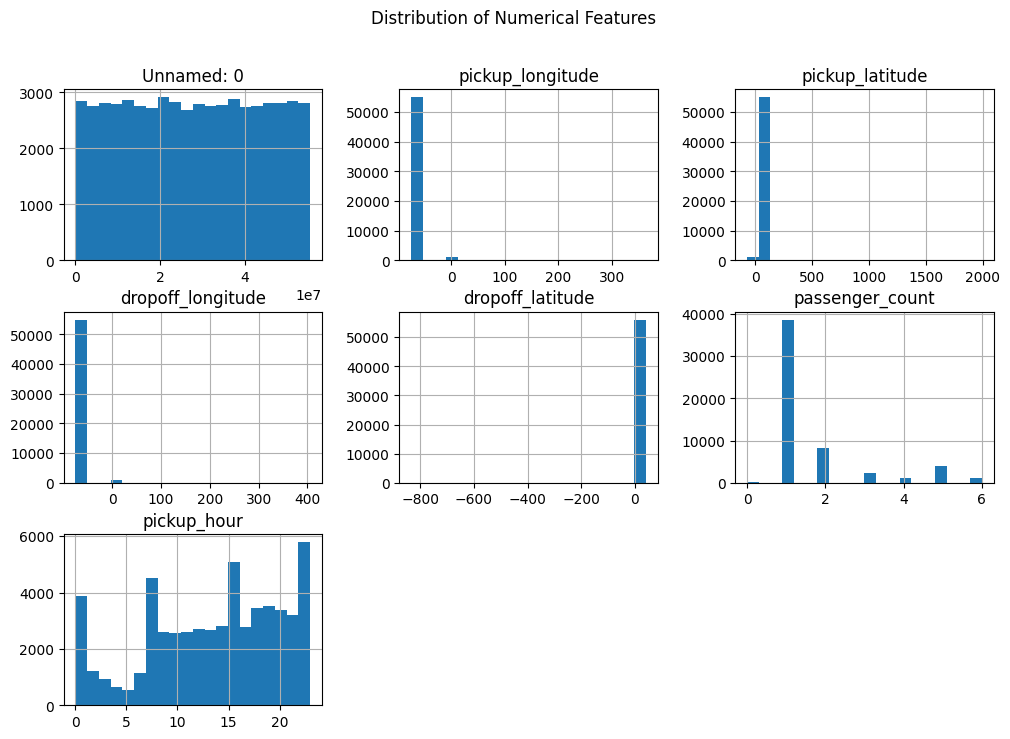

In [33]:
# Check the distribution of numerical features
X_train.hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Numerical Features')
plt.show()

In [36]:
print('pickup_datetime' in X_train.columns)
print('pickup_datetime' in train_data.columns)

False
True


In [37]:
print(X_train.dtypes)

Unnamed: 0             int64
key                   object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
pickup_hour            int64
dtype: object


In [40]:
train_data = train_data.drop('pickup_datetime', axis=1)

In [41]:
# Model Training (Random Forest example)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

ValueError: could not convert string to float: '2009-08-11 10:44:00.000000145'